In [1]:
import numpy as np
import control
import control.matlab
import math            
import cmath
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from control_utils import step_info, step_info_theoretical, plot_responses, errors

from pprint import pprint

# Analógico

mS = 99.99999999999999 ,  tetaS = 135.0
mG = 0.005557846733896036 ,  tetaG = 96.45033275656388
Tz[s] = 0.14853527021354776 Tp[s] = 0.00751455314414382

 1.337 s + 9
--------------
0.007515 s + 1



/opt/conda/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


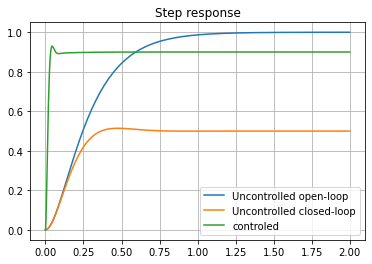

In [2]:
def project_analog_LR(
    omega:float,
    zeta:float,
    Gp:control.xferfcn.TransferFunction, 
    H:control.xferfcn.TransferFunction=1, 
    Kp:float = 1,
    Kv:float = np.inf,
    Ka:float = np.inf,
    tfinal:float = 2,
    plot=True,
) -> control.xferfcn.TransferFunction:
    '''
    @param Gp: plant TF
    @param H: feedback TF
    @param omega, zeta, K: desired system performance
    Returns Gc: controller TF
    '''


    ###
    i=1j
    s = control.tf([1, 0], [1])

    #gain for the desired error
    # TODO: this is wrong
    if Ka!=np.inf: #order 3 or above
        Kc = (Ka/(s*s*G*H)).horner(0)
    elif Kv!=np.inf: #order 2
        Kc= (Kv/(s*G*H)).horner(0)
    elif Kp!=np.inf: #order 1
        Kc = (Kp/(Gp*H)).horner(0)
    Kc = Kc.flat[0]

    s1= -zeta*omega+(omega*(1-zeta**2)**0.5)*i;
    mS = np.abs(s1)
    tetaS = np.angle(s1)
    Gs1= (Gp*H)(s1)
    mG = np.abs(Gs1)
    tetaG = np.angle(Gs1)
    print('mS =', mS, ',  tetaS =', 180*tetaS/np.pi)
    print('mG =', mG, ',  tetaG =', 180*tetaG/np.pi)

    Tz= np.real((np.sin(tetaS)-(Kc*mG*np.sin(tetaG-tetaS)))/(Kc*mG*mS*np.sin(tetaG)));
    Tz = Tz.flat[0]
    Tp= np.real(-((Kc*mG*np.sin(tetaS))+(np.sin(tetaG+tetaS)))/(mS*np.sin(tetaG)));
    Tp = Tp.flat[0]
    Gc = Kc*control.tf([Tz, 1], [Tp, 1])
    print('Tz[s] =', Tz, 'Tp[s] =', Tp)
    print(Gc)
    
    if plot:
        x, y = control.step_response(Gp, tfinal)
        plt.plot(x,y, label='Uncontrolled open-loop')

        x, y = control.step_response(control.feedback(Gp, 1), tfinal)
        plt.plot(x,y, label='Uncontrolled closed-loop')

        x, y = control.step_response(control.feedback(Gp*Gc, 1), tfinal)
        plt.plot(x,y, label='controled')

        plt.title('Step response')
        plt.legend(loc='lower right')
        plt.grid()

    return Gc

H = control.tf(1,1)
Gp = control.tf(1,[0.02, 0.3, 1]);
Gc = project_analog_LR(omega=100, zeta=np.sqrt(2)/2, Gp=Gp, H=H, Kp=9)

In [3]:
# Bode plot
'''
gm (float) – Gain margin
pm (float) – Phase margin (in degrees)
wg (float) – Frequency for gain margin (at phase crossover, phase = -180 degrees)
wp (float) – Frequency for phase margin (at gain crossover, gain = 1)
'''
FTMA = Gp*Gc
control.bode(FTMA, margins=True)
gm, pm, wg, wp = control.margin(FTMA)

/opt/conda/lib/python3.9/site-packages/control/xferfcn.py:987: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


# Plano w

In [4]:
# substituir z por (1 + w*T/2)/(1 - w*T/2) na Gz
# substituir w por j*v
# aplicar project_analog_LR

# Como??????